[IPython Notebook](LC.ipynb) |  [Python Script](LC.py)

LC Datasets and Options
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [ ]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger(clevel='INFO')

b = phoebe.Bundle.default_binary()

Dataset Parameters
--------------------------

Let's create the ParameterSets which would be added to the Bundle when calling add_dataset. Later we'll call add_dataset, which will create and attach both these ParameterSets for us.

In [3]:
ps, constraints = phoebe.dataset.lc()
print ps

time: [] d
flux: [] W / m3
sigma: [] W / m3


In [4]:
ps_dep = phoebe.dataset.lc_dep()
print ps_dep

ParameterSet: 8 parameters
                ld_func@_default: interp
              ld_coeffs@_default: [ 0.5  0.5]
                        passband: Johnson:V
                 intens_weighing: energy
              pblum_ref@_default: 
                  pblum@_default: 12.5663706144 W
                              l3: 0.0 W / m3
                         exptime: 0.0 s


### time

In [5]:
print ps['time']

Qualifier: time
Description: Observed times
Value: [] d
Constrained by: 
Constrains: None
Related to: None


### flux

In [6]:
print ps['flux']

Qualifier: flux
Description: Observed flux
Value: [] W / m3
Constrained by: 
Constrains: None
Related to: None


### sigma

In [7]:
print ps['sigma']

Qualifier: sigma
Description: Observed uncertainty on flux
Value: [] W / m3
Constrained by: 
Constrains: None
Related to: None


### ld_func

In [8]:
print ps_dep['ld_func']

Qualifier: ld_func
Description: Limb darkening model
Value: logarithmic
Choices: uniform, linear, logarithmic, quadratic, square_root, power, claret, hillen, prsa


### ld_coeffs

In [9]:
print ps_dep['ld_coeffs']

Qualifier: ld_coeffs
Description: Limb darkening coefficients
Value: [ 0.5  0.5]
Constrained by: 
Constrains: None
Related to: None


### passband

In [10]:
print ps_dep['passband']

Qualifier: passband
Description: Passband
Value: Johnson:V
Choices: TRES:23, Johnson:V, Kepler:mean


### intens_weighing

In [11]:
print ps_dep['intens_weighing']

Parameter: intens_weighing
                       Qualifier: intens_weighing
                     Description: Whether passband intensities are weighted by energy of photons
                           Value: energy
                         Choices: energy, photon



### l3

See the ["Third" Light tutorial](l3)

In [12]:
print ps_dep['l3']

Qualifier: l3
Description: Third light
Value: 0.0 W / m3
Constrained by: 
Constrains: None
Related to: None


### alb

In [13]:
print ps_dep['alb']

Qualifier: alb
Description: Passband Bond's albedo, alb=0 is no reflection
Value: 0.0
Constrained by: 
Constrains: None
Related to: None


Compute Options
------------------

Let's look at the compute options (for the default PHOEBE 2 backend) that relate to computing fluxes and the LC dataset.

Other compute options are covered elsewhere:
* parameters related to dynamics are explained in the section on the [ORB dataset](ORB)
* parameters related to meshing, eclipse detection, and subdivision are explained in the section on the [MESH dataset](MESH)

In [14]:
ps_compute = phoebe.compute.phoebe()
print ps_compute

ParameterSet: 25 parameters
                enabled@_default: True
                 dynamics_method: keplerian
                            ltte: False
                              gr: False
                        stepsize: 0.01
                      integrator: ias15
               reflection_method: wilson
                 boosting_method: none
                       protomesh: False
                          pbmesh: False
            mesh_method@_default: marching
                  delta@_default: 0.1
              maxpoints@_default: 100000
      distortion_method@_default: roche
               gridsize@_default: 40
                     mesh_offset: True
                  eclipse_method: native
                    atm@_default: ck2004
              lc_method@_default: numerical
             fti_method@_default: None
  fti_oversample@_default@_de...: 5
     rv_method@_default@_default: flux-weighted
       rv_grav@_default@_default: False
    etv_method@_default@_default: crossing


### lc_method

In [15]:
print ps_compute['lc_method']

Qualifier: lc_method
Description: Method to use for computing LC fluxes
Value: numerical
Choices: numerical, analytical


### refl

In [16]:
print ps_compute['refl']

ParameterSet: 0 parameters
NO PARAMETERS


### refl_num

In [17]:
print ps_compute['refl_num']

NO PARAMETERS


### irradiation_alg

In [17]:
print ps_compute['boosting_method']

Parameter: boosting_method
                       Qualifier: boosting_method
                     Description: Type of boosting method
                           Value: none
                         Choices: none, linear



### boosting_alg

In [19]:
print ps_compute['boosting_alg']

NO PARAMETERS


For more details on boosting, see the [Beaming and Boosting example script](../examples/beaming_boosting)

### atm

In [18]:
print ps_compute['atm']

Qualifier: atm
Description: Atmosphere table
Value: blackbody
Choices: blackbody, atmcof, extern_atmx, extern_planckint, ck2004


### heating

In [21]:
print ps_compute['heating']

NO PARAMETERS


For more details on heating, see the [Reflection and Heating example script](../examples/reflection_heating)

Synthetics
------------------

In [19]:
b.add_dataset('LC', time=np.linspace(0,3,101), dataset='lc01')

<ParameterSet: 12 parameters | kinds: lc, lc_dep>

In [20]:
b.add_compute()

<ParameterSet: 21 parameters | components: primary, secondary>

In [21]:
b.run_compute()

/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/eclipse.py:10: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  hull,

<ParameterSet: 2 parameters | qualifiers: flux, time>

In [22]:
b['LC@model'].twigs

['time@lc01@phoebe01@tmpmodel@LC@model',
 'flux@lc01@phoebe01@tmpmodel@LC@model']

In [23]:
print b['time@LC@model']

Qualifier: time
Description: Observed times
Value: [ 0.    0.03  0.06 ...,  2.94  2.97  3.  ] d
Constrained by: 
Constrains: None
Related to: None


In [24]:
print b['flux@LC@model']

Qualifier: flux
Description: Observed flux
Value: [ 0.9414286   1.22773336  1.51287182 ...,  1.5130426   1.22773597
  0.9414286 ] W / m3
Constrained by: 
Constrains: None
Related to: None


Plotting
---------------

By default, LC datasets plot as flux vs time.

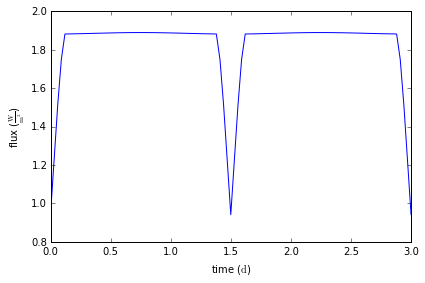

In [25]:
axs, artists = b['LC@model'].plot()

Since these are the only two columns available in the synthetic model, the only other option is to plot in phase instead of time.

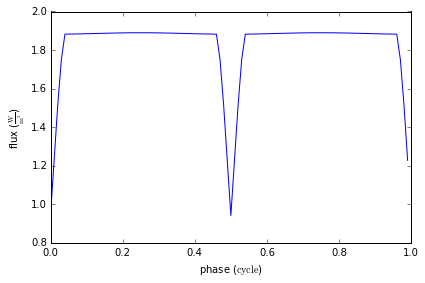

In [26]:
axs, artists = b['LC@model'].plot(x='phase')

In system hierarchies where there may be multiple periods, it is also possible to determine whose period to use for phasing.

In [27]:
b['period'].components

['binary', 'primary', 'secondary']

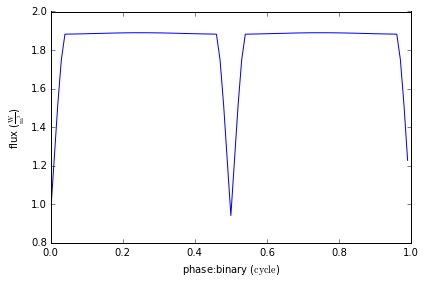

In [28]:
axs, artists = b['LC@model'].plot(x='phase:binary')

Mesh Fields
---------------------

If a MESH dataset exists at any of the same times as the time array in the LC dataset, OR if store_mesh is set to True in the compute options, then flux-related surface element quantities will be available in the model as well.

Let's add a single mesh at the first time of the light-curve and re-call run_compute

In [29]:
b.add_dataset('MESH', time=[0], dataset='mesh01')

<ParameterSet: 2 parameters | contexts: compute, dataset>

In [30]:
b.run_compute()

/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/eclipse.py:10: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  hull,

<ParameterSet: 64 parameters | methods: MESH, LC>

In [31]:
print b['model'].datasets

['mesh01', 'lc01']


These new columns are stored with the LC's dataset tag, but with the MESH method.

In [32]:
b.filter(dataset='lc01', method='MESH', section='model').twigs

['0.0@pblum@primary@lc01@phoebe01@latest@mesh@model',
 '0.0@abs_intensities@primary@lc01@phoebe01@latest@mesh@model',
 '0.0@normal_intensities@primary@lc01@phoebe01@latest@mesh@model',
 '0.0@intensities@primary@lc01@phoebe01@latest@mesh@model',
 '0.0@abs_normal_intensities@primary@lc01@phoebe01@latest@mesh@model',
 '0.0@boost_factors@primary@lc01@phoebe01@latest@mesh@model',
 '0.0@pblum@secondary@lc01@phoebe01@latest@mesh@model',
 '0.0@abs_intensities@secondary@lc01@phoebe01@latest@mesh@model',
 '0.0@normal_intensities@secondary@lc01@phoebe01@latest@mesh@model',
 '0.0@intensities@secondary@lc01@phoebe01@latest@mesh@model',
 '0.0@abs_normal_intensities@secondary@lc01@phoebe01@latest@mesh@model',
 '0.0@boost_factors@secondary@lc01@phoebe01@latest@mesh@model']

Any of these columns are then available to use as edge or facecolors when plotting the mesh (see the section on the [MESH dataset](MESH)), but since the MESH elements are stored with the 'mesh01' dataset tag, and the LC quantities are stored with the 'lc01' dataset tag, it is important not to provide the 'mesh01' dataset tag before plotting.

/home/kyle/.local/lib/python2.7/site-packages/phoebe/frontend/plotting.py:240: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pckwargs['edgecolors'] in ['none', 'None', None] and pckwargs['facecolors'] not in ['none', 'None', None]:
/home/kyle/.local/lib/python2.7/site-packages/phoebe/frontend/plotting.py:240: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if pckwargs['edgecolors'] in ['none', 'None', None] and pckwargs['facecolors'] not in ['none', 'None', None]:
/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


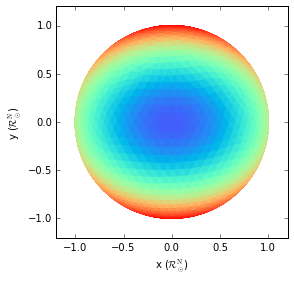

In [33]:
axs, artists = b['MESH@model'].plot(facecolor='intens_norm_rel', edgecolor=None)
# NOT:
# b['mesh01@model'].plot(facecolor='intens_norm_rel', edgecolor=None)

Now let's look at each of the available fields.

### pblum

For more details, see the tutorial on [Passband Luminosities](pblum)

In [34]:
print b['pblum@primary@lc01@MESH@model']

Qualifier: pblum
Description: Passband Luminosity of entire star
Value: 12.5663706144 W
Constrained by: 
Constrains: None
Related to: None


'pblum' is the passband luminosity of the entire star/mesh - this is a single value (unlike most of the parameters in the mesh) and does not have per-element values.

### intens_norm_abs

In [35]:
print b['intens_norm_abs@primary@lc01@MESH@model']

Qualifier: intens_norm_abs
Description: Per-element value for lc01 dataset
Value: [  1.87722276e+14   1.87723124e+14   1.87722276e+14 ...,
   1.88500582e+14   1.88490770e+14   1.88478818e+14] W / m3
Constrained by: 
Constrains: None
Related to: None


'intens_norm_abs' are the absolute normal intensities per-element.

### intens_norm_rel

In [36]:
print b['intens_norm_rel@primary@lc01@MESH@model']

Qualifier: intens_norm_rel
Description: Per-element value for lc01 dataset
Value: [  9.40767245e-28   9.40771497e-28   9.40767245e-28 ...,
   9.44667714e-28   9.44618541e-28   9.44558645e-28] W / m3
Constrained by: 
Constrains: None
Related to: None


'intens_norm_rel' are the relative normal intensities per-element.

### ld

In [37]:
print b['ld@primary@lc01@MESH@model']

Qualifier: ld
Description: Per-element value for lc01 dataset
Value: [ 0.00083019  0.0008351   0.00083019 ...,  0.50722639  0.51258445
  0.53328344]
Constrained by: 
Constrains: None
Related to: None


'ld' are the limb-darkening per-element.

### ampl_boost

In [38]:
print b['ampl_boost@primary@lc01@MESH@model']

Qualifier: ampl_boost
Description: Per-element value for lc01 dataset
Value: [ 1.  1.  1. ...,  1.  1.  1.]
Constrained by: 
Constrains: None
Related to: None


'ampl_boost' are the boosting amplitudes per-element.

### boost_factors

In [39]:
print b['boost_factors@primary@lc01@mesh@model']

Parameter: 0.0@boost_factors@primary@latest@model
                       Qualifier: boost_factors
                     Description: Per-element value for lc01 dataset
                           Value: [ 1.  1.  1. ...,  1.  1.  1.]
                  Constrained by: 
                      Constrains: None
                      Related to: None



'boost_factors' are the boosting amplitudes per-element.

### intens_proj_rel

In [43]:
print b['intens_proj_rel@primary@lc01@MESH@model']

Qualifier: intens_proj_rel
Description: Per-element value for lc01 dataset
Value: [  9.40767245e-28   9.40771497e-28   9.40767245e-28 ...,
   4.79160394e-28   4.84196773e-28   5.03717482e-28] W / m3
Constrained by: 
Constrains: None
Related to: None


'intens_proj_rel' are the projected relative intensities (towards the observer) per-element.